# El tratamiento de las variables categóricas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
style.use("ggplot")

In [2]:
data = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")
data1 = data.copy()
data.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [3]:
data.shape

(2362, 9)

In [4]:
data.columns.values

array(['Transaction ID', 'Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender', 'City Tier', 'Total Spend'],
      dtype=object)

In [5]:
data["City Tier"].unique(), data.Gender.unique()

(array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [6]:
dummy_gender = pd.get_dummies(data.Gender, prefix="Gender")
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [7]:
dummy_city_tier = pd.get_dummies(data["City Tier"], prefix="City Tier")
dummy_city_tier.head()

,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [8]:
data_new = pd.concat([data,dummy_gender,dummy_city_tier],axis=1)

In [9]:
names = data1.columns.values.tolist()
names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [10]:
# Otra manera de hacerlo
data_new = data.join(dummy_gender).join(dummy_city_tier)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [11]:
feature_cols = ["Monthly Income","Transaction Time","Gender_Male","Gender_Female","City Tier_Tier 1","City Tier_Tier 2","City Tier_Tier 3","Record"]

In [12]:
X = data_new[feature_cols]
Y = data_new["Total Spend"]

In [13]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lm.intercept_

-79.41713030137362

In [15]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01,  1.31025013e+02, -1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [16]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.1549461254958959),
 ('Gender_Male', 131.02501325554627),
 ('Gender_Female', -131.02501325554616),
 ('City Tier_Tier 1', 76.76432601049508),
 ('City Tier_Tier 2', 55.138974309232616),
 ('City Tier_Tier 3', -131.90330031972772),
 ('Record', 772.233445744565)]

In [17]:
lm.score(X,Y)

0.9179923586131016

# El modelo puede ser escrito como:
$$\text{Total_spend = }-79.4171303013718 + 1.47538980e-01\cdot MI + 1.54946125e-01\cdot TT - 1.31025013e+02\cdot GF + 1.31025013e+02\cdot GM + 7.67643260e+01\cdot CT1 + 5.51389743e+01\cdot CT2 - 1.31903300e+02\cdot CT3 + 7.72233446e+02\cdot R$$
    
   * Si es hombre y vive en City Tier 1:
   
Total_spend=-79.4171303013718 + 1.47538980e-01*MI + 1.54946125e-01*TT + 1.31025013e+02*GM +  7.67643260e+01*CT1 + .72233446e+02*R
   * Si es hombre y vive en City Tier 2:
   
Total_spend=-79.4171303013718 + 1.47538980e-01*MI + 1.54946125e-01*TT + 1.31025013e+02*GM +  55.1389743092325*CT2 + .72233446e+02*R

   * Si es hombre y vive en City Tier 3:
   
Total_spend=-79.4171303013718 + 1.47538980e-01*MI + 1.54946125e-01*TT + 1.31025013e+02*GM +  -131.9033003197277*CT3 + .72233446e+02*R

* Si es mujer y vive en City Tier 1:

Total_spend=-79.4171303013718 + 1.47538980e-01*MI + 1.54946125e-01*TT - 1.31025013e+02*GF + 7.67643260e+01*CT1  + 7.72233446e+02*R 

* Si es mujer y vive en City Tier 2:

Total_spend=-79.4171303013718 + 1.47538980e-01*MI + 1.54946125e-01*TT - 1.31025013e+02*GF + 55.1389743092325*CT2  + 7.72233446e+02*R

* Si es mujer y vive en City Tier 3:

Total_spend=-79.4171303013718 + 1.47538980e-01*MI + 1.54946125e-01*TT - 1.31025013e+02*GF + -131.9033003197277*CT2  + 7.72233446e+02*R

In [18]:
#Hacer el modelo más pequeño
print(-79.4171303013718 + 1.31025013e+02 + 7.67643260e+01)
print(-79.4171303013718 + 1.31025013e+02 + 55.1389743092325)
print(-79.4171303013718 + 1.31025013 + 55.1389743092325)
print(-79.4171303013718 - 1.31025013e+02 + 7.67643260e+01)
print(-79.4171303013718 - 1.31025013e+02 + 55.1389743092325)
print(-79.4171303013718 - 1.31025013e+02 + -131.9033003197277)

128.37220869862819
106.74685700786071
-22.967905862139297
-133.67781730137182
-155.3031689921393
-342.3454436210995


## Recordar que se pueden utilizar modelos de n-1. Por lo tanto, si acortamos el modelo nos quedaría de la siguiente manera:
   * Si es hombre y vive en City Tier 1:
   
Total_spend= 128.37220869862819 + 1.47538980e-01*MI + 1.54946125e-01*TT + .72233446e+02*R
   * Si es hombre y vive en City Tier 2:
   
Total_spend=106.74685700786071 + 1.47538980e-01*MI + 1.54946125e-01*TT + .72233446e+02*R

   * Si es hombre y vive en City Tier 3:
   
Total_spend=-22.967905862139297 + 1.47538980e-01*MI + 1.54946125e-01*TT  + .72233446e+02*R

* Si es mujer y vive en City Tier 1:

Total_spend= -133.67781730137182 + 1.47538980e-01*MI + 1.54946125e-01*TT + 7.72233446e+02*R 

* Si es mujer y vive en City Tier 2:

Total_spend= - 155.3031689921393 + 1.47538980e-01*MI + 1.54946125e-01*TT + 7.72233446e+02*R

* Si es mujer y vive en City Tier 3:

Total_spend=-342.3454436210995 + 1.47538980e-01*MI + 1.54946125e-01*TT + 7.72233446e+02*R

In [19]:
data_new["prediction"] = (-79.41713030137362 + data_new['Monthly Income']*0.14753898049205738 + 
                          data_new['Transaction Time']* 0.15494612549589545 + 
                          data_new['Gender_Female'] * (-131.02501325554567) +  
                          data_new['Gender_Male'] * 131.0250132555456 + 
                          data_new['City Tier_Tier 1']* 76.76432601049527 +  
                          data_new['City Tier_Tier 2']* 55.138974309232474 +
                          data_new['City Tier_Tier 3']* (-131.9033003197278) + data_new['Record']* 772.2334457445648)

In [20]:
lm.predict(data_new[feature_cols]) # Otra manera más simple

array([4903.69671986, 4799.4348257 , 5157.08250392, ..., 9050.6903581 ,
       8220.59609399, 6814.31308959])

In [21]:
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City Tier_Tier 1,City Tier_Tier 2,City Tier_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [22]:
SSD = np.sum((data_new["Total Spend"]-data_new["prediction"])**2)
SSD

1517733985.3408163

In [23]:
RSE = np.sqrt(SSD/((len(data_new)-len(X.columns)-1)))
RSE

803.1318809818165

In [24]:
RSE/np.mean(data_new["Total Spend"])

0.13031135680294162

### Eliminar variables dummy redundantes 

In [25]:
dummy_gender = pd.get_dummies(data_new["Gender"],prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [26]:
dummy_city_tier = pd.get_dummies(data_new["City Tier"],prefix = "City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [27]:
data_new = data_new[data.columns.values].join(dummy_city_tier).join(dummy_gender)
data_new = data_new.drop(["Gender","City Tier"],axis=1)
data_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,City_Tier 2,City_Tier 3,Gender_Male
0,TXN001,42,10,7313,627.668127,5,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,4134.976648,1,0,0
2,TXN003,47,11,22845,873.469701,2,5166.614455,1,0,1
3,TXN004,50,11,18552,380.219428,7,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,3254.160485,1,0,0


In [28]:
feature_cols = data_new.columns.values.tolist()
feature_cols.remove("Transaction ID")
feature_cols.remove("Age ")
feature_cols.remove(" Items ")
feature_cols.remove("Total Spend")
feature_cols

['Monthly Income',
 'Transaction Time',
 'Record',
 'City_Tier 2',
 'City_Tier 3',
 'Gender_Male']

In [29]:
X = data_new[feature_cols]
Y = data_new["Total Spend"]

In [30]:
X.head()

,Monthly Income,Transaction Time,Record,City_Tier 2,City_Tier 3,Gender_Male
0,7313,627.668127,5,0,0,0
1,17747,126.904567,3,1,0,0
2,22845,873.469701,2,1,0,1
3,18552,380.219428,7,0,0,0
4,14439,403.374223,2,1,0,0


In [31]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
lm.intercept_, lm.coef_

(-133.67781754642238,
 array([ 1.47538980e-01,  1.54946125e-01,  7.72233446e+02, -2.16253517e+01,
        -2.08667626e+02,  2.62050027e+02]))

In [33]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549590064),
 ('Record', 772.2334457445637),
 ('City_Tier 2', -21.62535170126261),
 ('City_Tier 3', -208.6676263302232),
 ('Gender_Male', 262.0500265110931)]

In [34]:
lm.score(X,Y)

0.9179923586131016

# LOS CAMBIOS REFLEJADOS EN:

* Gender_Male: antes-> 131.02501325554607, ahora->262.050026511093, Ahora= gender_male_antes - gender_female_antes

* Gender_Famale: antes-> -131.02501325554624, ahora->0

* CT1: antes -> 76.76432601049513,  ahora->0

* CT2: antes ->  55.1389743092325, ahora-> -21.625351701262662, Ahora= 55.1389743092325 - 76.76432601049513

* CT3: antes -> -131.9033003197277, ahora-> -208.66762633022324, Ahora= -131.9033003197277 - 76.76432601049513

##### **El modelo no cambia, simplemente se hace una reducción  de variables y los coeficientes de las dummys cambia para ajustarse.**

### <font color="red"> Transformación de variables para conseguir una relación no lineal </font>

In [35]:
data = pd.read_csv("../datasets/auto/auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [36]:
data.shape

(406, 9)

In [37]:
data.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [38]:
data.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [39]:
data.nunique()

mpg             129
cylinders         5
displacement     83
horsepower       93
weight          356
acceleration     96
model year       13
origin            3
car name        312
dtype: int64

In [40]:
data.notna().sum()

mpg             398
cylinders       406
displacement    406
horsepower      400
weight          406
acceleration    406
model year      406
origin          406
car name        406
dtype: int64

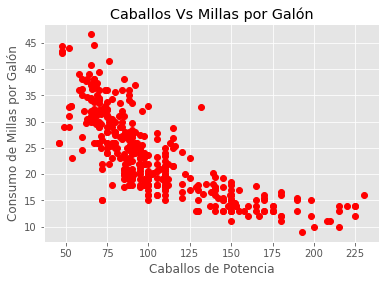

In [41]:
data["mpg"] = data["mpg"].dropna(axis=0)
data.horsepower = data.horsepower.dropna()
fig, ax  =plt.subplots(1,1)
ax.plot(data.horsepower,data.mpg,"ro")
ax.set_xlabel("Caballos de Potencia")
ax.set_ylabel("Consumo de Millas por Galón")
ax.set_title("Caballos Vs Millas por Galón")
plt.show()

### Modelo de Regresión Lineal

$$\text{mpg = } \alpha + \beta \cdot \text{horsepower}$$

In [42]:
X = data["horsepower"].fillna(np.mean(data.horsepower))
X_data = X[:,np.newaxis];X.isna().sum()

0

In [43]:
Y =  data["mpg"].fillna(np.mean(data.mpg))
Y.isna().sum(), type(Y)

(0, pandas.core.series.Series)

In [44]:
X = X.values.reshape(-1,1) #X_data = X[:,np.newaxis] 
X[:10]

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.],
       [198.],
       [220.],
       [215.],
       [225.],
       [190.]])

In [45]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
lm.score(X_data,Y)

0.574653340645025

In [47]:
lm.coef_, lm.intercept_

(array([-0.15244505]), 39.53387982903449)

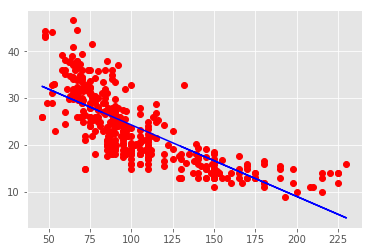

In [48]:
plt.plot(data.horsepower,data.mpg,"ro")
plt.plot(X,lm.predict(X), color="blue")

### Modelo de Regresión Cuadrático
$$\text{mpg = } \alpha +  \beta\cdot horsepower^2$$

In [49]:
X_data = X**2
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
lm.score(X_data,Y)

0.4849887034823205

In [51]:
lm.intercept_

30.405683105007366

In [52]:
lm.coef_

array([-0.00055043])

$$\text{El modelo que obtenemos es; 
y = } \ 30.4056 - 0.00055\cdot X^2$$

In [53]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD,RSE,error

(12490.350340501926, 5.553410772769817, 0.236168898529981)

### Modelo de regresión  lineal y cuadrático
$$\text{mpg = } \alpha + \beta \cdot horsepower + \gamma\cdot horsepower^2$$

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [55]:
poly = PolynomialFeatures(degree=2) 
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [56]:
X_data = poly.fit_transform(X) #Hará la transformación lineal a partir de los datos originales
# Fit to data, then transform it.
# Fits transformer to X and y with optional parameters fit_params
# and returns a transformed version of X.

# Examples
# --------
# >>> X = np.arange(6).reshape(3, 2)
# >>> X
# array([[0, 1],
#       [2, 3],
#        [4, 5]])
# >>> poly = PolynomialFeatures(2)
# >>> poly.fit_transform(X)
# array([[ 1.,  0.,  1.,  0.,  0.,  1.],
#       [ 1.,  2.,  3.,  4.,  6.,  9.],
#       [ 1.,  4.,  5., 16., 20., 25.]])
# >>> poly = PolynomialFeatures(interaction_only=True)
# >>> poly.fit_transform(X)
# array([[ 1.,  0.,  1.,  0.],
#       [ 1.,  2.,  3.,  6.],
#       [ 1.,  4.,  5., 20.]])

X_data

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [57]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
lm.score(X_data,Y)

0.6439066584257469

In [59]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

In [60]:
lm.intercept_

55.02619244708036

$$\text{ Modelo; MPG = } 55.02619 - 0.4340\cdot HorsePower + 0.00112615\cdot HorsePower^2$$

In [61]:
# Otra manera de hacerlo
data = pd.read_csv("../datasets/auto/auto-mpg.csv")
from statsmodels.formula.api import ols
data["horsepower2"]=data.horsepower**2
lm = ols(formula="mpg~horsepower+horsepower2",data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Sun, 18 Aug 2019   Prob (F-statistic):           5.40e-99
Time:                        01:11:11   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Modelo de regresión  lineal, cuadrático y cubíco
$$\text{mpg = } \alpha + \beta \cdot horsepower + \beta_1 \cdot horsepower^2 +  \beta_2 \cdot horsepower^3$$

In [62]:
poly3 = PolynomialFeatures(degree=3)
X_data = poly3.fit_transform(X)
X_data

array([[1.000000e+00, 1.300000e+02, 1.690000e+04, 2.197000e+06],
       [1.000000e+00, 1.650000e+02, 2.722500e+04, 4.492125e+06],
       [1.000000e+00, 1.500000e+02, 2.250000e+04, 3.375000e+06],
       ...,
       [1.000000e+00, 8.400000e+01, 7.056000e+03, 5.927040e+05],
       [1.000000e+00, 7.900000e+01, 6.241000e+03, 4.930390e+05],
       [1.000000e+00, 8.200000e+01, 6.724000e+03, 5.513680e+05]])

In [63]:
lm1 = LinearRegression()
lm1.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
lm1.coef_

array([ 0.00000000e+00, -5.27113167e-01,  1.89736722e-03, -1.95723195e-06])

In [65]:
lm1.intercept_

58.44877411191831

In [66]:
lm1.score(X_data,Y)

0.6444678885560744

$$\text{ Modelo; MPG = } 58.448774 - 5.271\cdot HorsePower + 0.0018973\cdot HorsePower^2 -.00000195 \cdot horsepower^3 $$

Regresión del grado : 1
Score Obtenido : 57.46533406450251%
Intercepto : 39.53387982903449
Coeficientes : [ 0.         -0.15244505]
Error Residual al Cuadrado 5.046879480825511
No se puede explicar del model el 0.21462773361633458
----------------------------------------------
Regresión del grado : 2
Score Obtenido : 64.39066584257469%
Intercepto : 55.02619244708036
Coeficientes : [ 0.         -0.43404318  0.00112615]
Error Residual al Cuadrado 4.61778115803654
No se puede explicar del model el 0.1963795466190689
----------------------------------------------
Regresión del grado : 3
Score Obtenido : 64.44678885560744%
Intercepto : 58.44877411191831
Coeficientes : [ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
Error Residual al Cuadrado 4.614140736300908
No se puede explicar del model el 0.19622473106036675
----------------------------------------------
Regresión del grado : 4
Score Obtenido : 64.67674189704502%
Intercepto : 40.096643848138505
Coeficientes : [ 0.00000

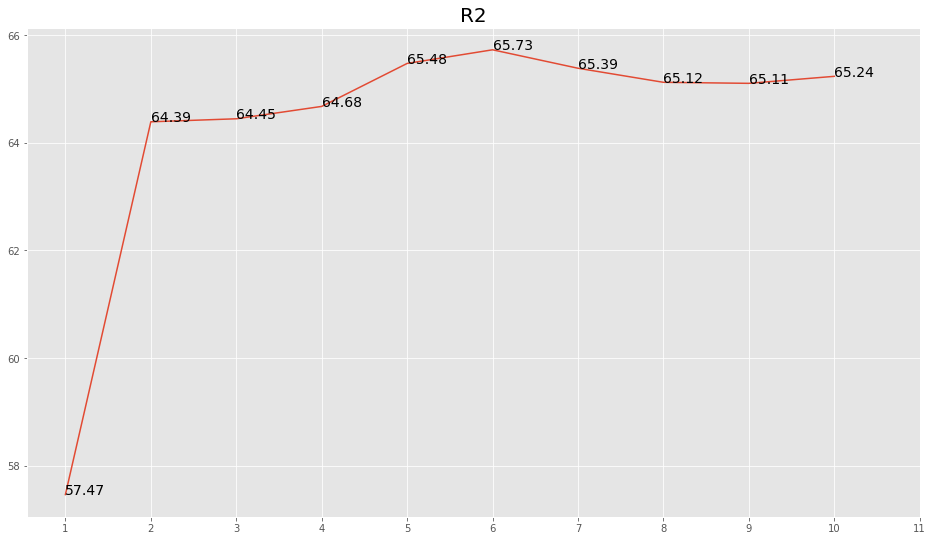

In [67]:
r2 = []
for k in range(1,11):
    poly = PolynomialFeatures(degree=k)
    X_data = poly.fit_transform(X)
    lm = LinearRegression()
    lm.fit(X_data,Y)
    print("Regresión del grado : {}".format(k))
    print("Score Obtenido : {}%".format(lm.score(X_data,Y)*100))
    print("Intercepto : {}".format(lm.intercept_))
    print("Coeficientes : {}".format(lm.coef_))
    SSD = np.sum((Y-lm.predict(X_data))**2)
    SRE = np.sqrt(SSD/(len(data.mpg)-1))
    print("Error Residual al Cuadrado {}".format(SRE))
    y_mean = np.mean(Y)
    error = SRE/y_mean
    print("No se puede explicar del model el {}".format(error))
    print("----------------------------------------------")
    r2.append(lm.score(X_data,Y)*100)
plt.figure(figsize=(16,9))
plt.plot(np.arange(1,11),r2)
plt.xticks([l for l in range(1,12)])
plt.title("R2",size=20)
for k,porcentaje in list(zip(np.arange(1,11),r2)):
    plt.text(k,r2[k-1],str(round(porcentaje,2)),size=14)
plt.show()

In [68]:
list(zip(np.arange(1,21),r2))[1][1]

64.39066584257469

### El problema de los outliers

 **Los outliers están alejados de la mayoría de los puntos del dataset. Puede ser bueno o malo. 
 Por lo general, si son muy pocos puntos se eliminan para que no distorcionen nuestro modelos o se busca el por qué de su aparición.**
 
 Se puede aplicar el apalancamiento de cada fila de datos del data frama: 
 #### $$\text{Leverage}_i =\  \frac{1}{n}+ \frac{(x_i-\bar{x})^2}{\sum_{i=1}^n (x_i-\bar{x})^2}$$
 
 Las filas con mayor apalancamiento del dataset se eliminan antes de proceder con el modelo.

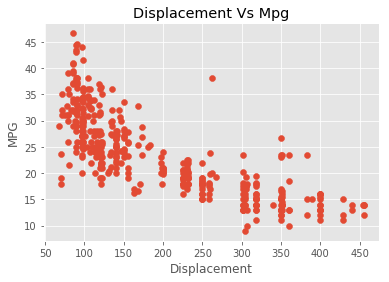

In [69]:
X = data.displacement.fillna(np.mean(data.displacement)).values.reshape(-1,1)
Y = data.mpg.fillna(data.mpg.mean()).values.reshape(-1,1)
plt.scatter(X,Y)
plt.title("Displacement Vs Mpg")
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.show()

In [70]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lm.score(X,Y)

0.6261049762826918

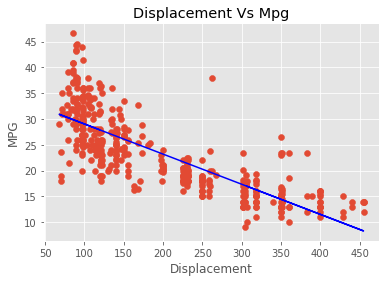

In [72]:
plt.scatter(X,Y)
plt.plot(X,lm.predict(X),"b")
plt.title("Displacement Vs Mpg")
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.show()

Encontrar Outliers

In [73]:
outliers = data[(data.mpg>20)&(data.displacement>250)]
outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,horsepower2
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia,19321.0
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado,15625.0
307,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham,8100.0
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls,11025.0
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel),7225.0


In [74]:
index_buenos = [l for l in data.index if l not in outliers.index]

In [75]:
data_auto_clean = data.iloc[index_buenos,[0,2]]
data_auto_clean.head()

,mpg,displacement
0,18.0,307.0
1,15.0,350.0
2,18.0,318.0
3,16.0,304.0
4,17.0,302.0


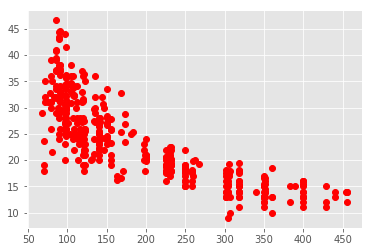

In [76]:
plt.plot(data_auto_clean.displacement,data_auto_clean.mpg,"ro")

In [77]:
X = data_auto_clean.mpg.fillna(data_auto_clean.mpg.mean()).values.reshape(-1,1)
Y = data_auto_clean.displacement.fillna(data_auto_clean.displacement.mean()).values.reshape(-1,1)
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
lm.score(X,Y)

0.6474495118320848

Text(0.5, 1.0, 'Horsepower')

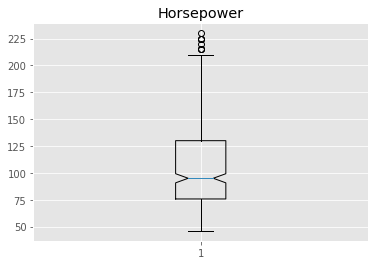

In [79]:
horse = data.horsepower.dropna()
plt.boxplot(horse,notch=True)
plt.title("Horsepower")

# Analizar los Residuos

* Los residuos son la diferencia entre el valor actual y la predicción hecha por el modelo. De forma típica, la disperción de los residuos debe estár distribuida de forma normal con media 0 y con una distribución de forma constante. Si los residuos siguen una distribución diferenciable probablemente el modelo esté mal, pues podría ser no lineal, de otro grado o como solución buscar un modelo diferente.
* Se asume que el término de error asociado al modelo tiene una varianza constante.
    * Heterocedasticidad: Varianza no constante. Se puede aplicar raíz cuadrada o logaritmo a las variables predictoras para erradicar este problema
    * Homocedasticidad: Varianza Constante